In [1]:
import os
os.chdir('../..')
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from keras.models import load_model
from keras.applications import ResNet50
from matplotlib import pyplot as plt
%matplotlib inline


# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [2]:
# Build the ResNet50 network with ImageNet weights
# model = ResNet50(weights='imagenet', include_top=True)
# layer_idx = utils.find_layer_idx(model, 'fc1000')
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.

model = load_model('trained/models/resnet50_lidar.h5')
# model = load_model('trained/models/inceptionresnetv2_rgb.h5')
layer_idx = utils.find_layer_idx(model, 'lidar_predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

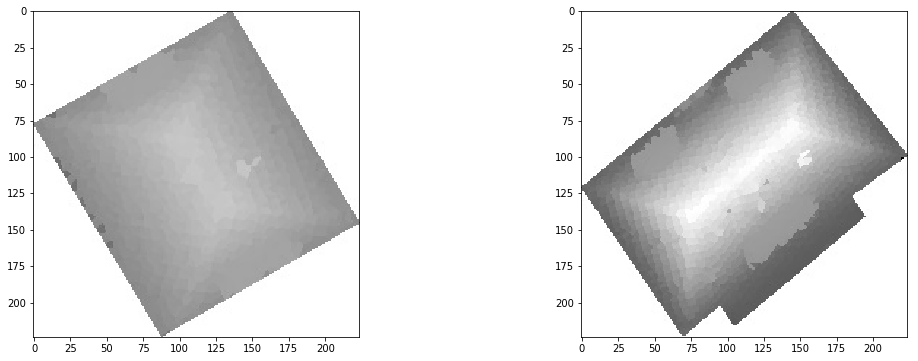

In [3]:
plt.rcParams['figure.figsize'] = (18, 6)

# img1 = utils.load_img('notebooks/KerasVis/imgs/ouzel1.jpg', target_size=(224, 224))
# img2 = utils.load_img('notebooks/KerasVis/imgs/ouzel2.jpg', target_size=(224, 224))
img1 = utils.load_img('notebooks/KerasVis/imgs/hipped01_lidar.jpg', target_size=(224, 224))
img2 = utils.load_img('notebooks/KerasVis/imgs/hipped02_lidar.jpg', target_size=(224, 224))
# img1 = utils.load_img('notebooks/KerasVis/imgs/310870679.jpg', target_size=(224, 224))
# img2 = utils.load_img('notebooks/KerasVis/imgs/313440433.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img2,cmap='gray', vmin=0, vmax=255)

<Figure size 1296x432 with 0 Axes>

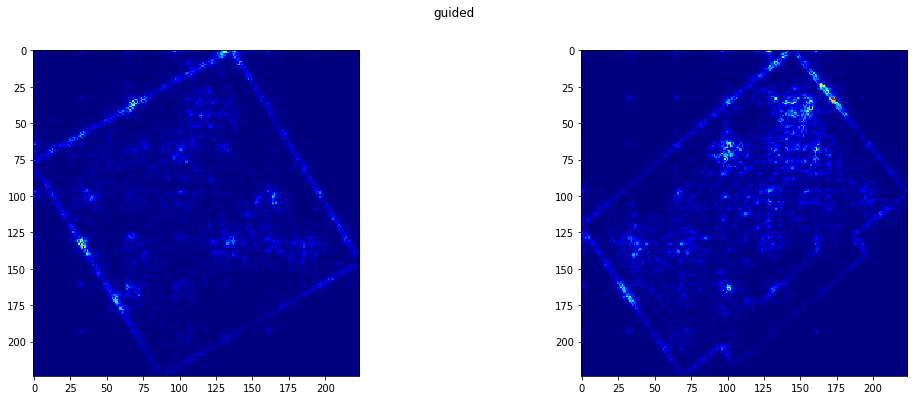

<Figure size 1296x432 with 0 Axes>

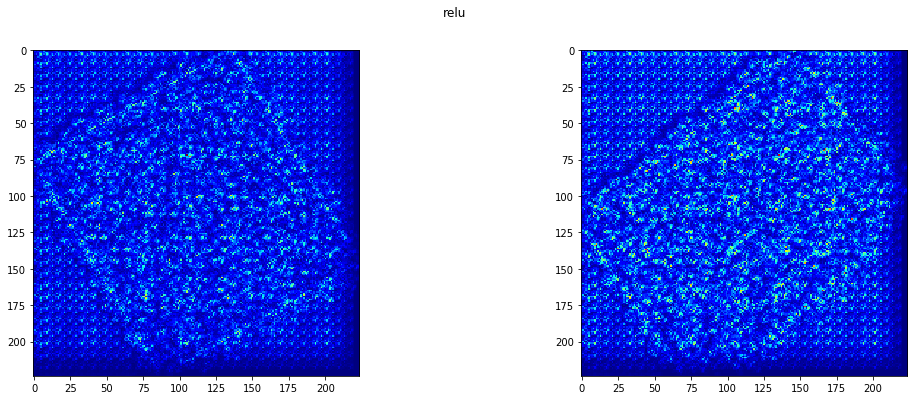

In [10]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=4, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

In [1]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'lidar_res5c_branch2c')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=5, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))

Using TensorFlow backend.


KeyboardInterrupt: 

In [10]:
model.predict(np.expand_dims(img2,axis=0))

array([[6.6596302e-05, 2.1454027e-06, 2.7442459e-07, 7.4940132e-08,
        5.6244971e-06, 9.4379687e-01, 5.6128260e-02, 1.8682853e-07]],
      dtype=float32)